In [ ]:
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn
%pip install pandas
%pip install numpy
%pip install scipy
%pip install nltk
%pip install scikit-learn

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv("twitter.csv" , sep = "," ,encoding = "utf-8")
df.head()

,label,tweet_id,query,user_name,text,year,month,day,hour,minute,second
0,0,1467810369,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009,4,6,22,19,45
1,0,1467810672,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009,4,6,22,19,49
2,0,1467810917,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,2009,4,6,22,19,53
3,0,1467811184,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6,22,19,57
4,0,1467811193,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",2009,4,6,22,19,57


In [5]:
negative_count = df[df['label'] == 0].shape[0]
positive_count = df[df['label'] == 4].shape[0]
print(f"Number of negative tweets (0): {negative_count}")
print(f"Number of positive tweets (4): {positive_count}")

Number of negative tweets (0): 800000
Number of positive tweets (4): 800000


In [6]:
df.head()

,label,tweet_id,query,user_name,text,year,month,day,hour,minute,second
0,0,1467810369,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009,4,6,22,19,45
1,0,1467810672,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009,4,6,22,19,49
2,0,1467810917,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,2009,4,6,22,19,53
3,0,1467811184,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009,4,6,22,19,57
4,0,1467811193,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",2009,4,6,22,19,57


<Figure size 1200x600 with 0 Axes>

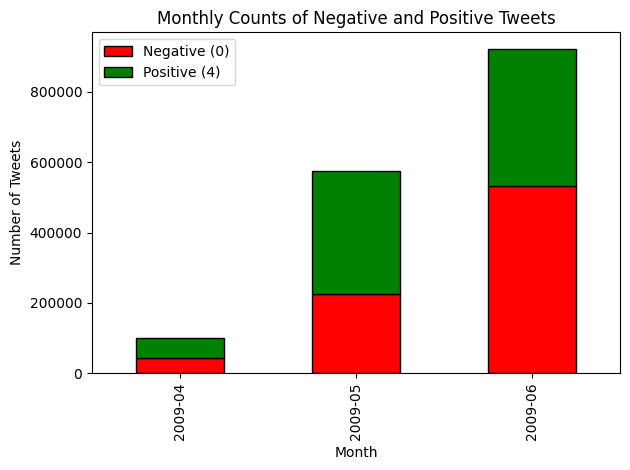

In [7]:
df['month'] = df['month'].astype(str)
df['label'] = df['label'].astype(str)
df['year_month'] = df['year'].astype(str) + '-' + df['month'].str.zfill(2)
monthly_counts = df.groupby(['year_month', 'label']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', stacked=True, color=['red', 'green'], edgecolor='black')
plt.title('Monthly Counts of Negative and Positive Tweets')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.legend(['Negative (0)', 'Positive (4)'])
plt.tight_layout()
plt.show()

In [8]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\ROG
[nltk_data]     Zephyrus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ROG
[nltk_data]     Zephyrus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

df_sampled = df['text'].sample(n=500000, random_state=42)

# Create a TfidfVectorizer instance
vectorizer = TfidfVectorizer()

# Apply preprocessing and transform the sampled data
X_sampled = vectorizer.fit_transform(df_sampled.apply(preprocess_text))


In [16]:
#take a sample of the labels
y_sampled = df['label'].sample(n=500000, random_state=42)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')


Accuracy: 0.75334
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76     49799
           4       0.78      0.70      0.74     50201

    accuracy                           0.75    100000
   macro avg       0.76      0.75      0.75    100000
weighted avg       0.76      0.75      0.75    100000

